# Dimensional Reduction

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

### Why we do dimensionality reduction
1. To speed up the execution of training process as the number of features will be less
2. To visualize data and gain insights about important features.
3. To compress data and save the space.
4. Sometimes we can reduce the noise in the data by doing dimensional reduction

### Draw backs of dimensional reduction
1. Information loss and degrade the performance of the training algorithms
2. Computalionally intensive to perform dimensional reduction techniques
3. Adds complexity to the data processing steps
4. Transformed features are hard to interpret

### Important dimensional reduction techniques
1. Principal Component Analysis (Normal PCA, Incremental PCA, Randomized PCA, Kernel PCA)
2. Locally Linear Embedding (LLE)
3. Multi Dimensional Scaling (MDS)
4. Isomap
5. T-Distributed Stochastic Neighbor Embedding (t-SNE)
6. Linear Discriminant Analysis (LDA)

### Creating 3D dataset

In [2]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

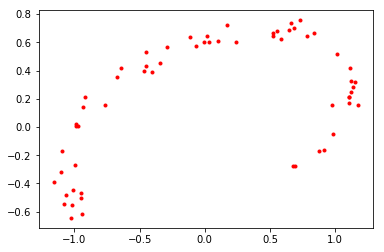

In [3]:
plt.plot(X[:, 0], X[:, 1], "r.")
plt.show()

### PCA

1. Need to center the data points with respect to their axis mean before we apply SVD
2. PCA is a projection learning type dimentionality reduction technique
3. PCA defines a lower dimentional hyperplane that lies closest to the data points, and then projects the data onto the hyperplane.
4. Need to choose a hyperplane which preserves the highest variance when the data is projected on to this hyperplane. This results in loss of less amount of information.
5. PCA can also be defined as a way to find the axis that minimizes the sum of the squares of the distances between original data points and the projections of these original data points on the this axis.
6. Second hyperplane is orthogonal to the first hyperplane and remaining hyperplanes are orthogonal to the first, second and so on.
7. The unit vector that defines this hyperplane is called the principal component.
8. A pair of PCs may even rotate(change in the sign to +/-) or swap, but the plane they define will generally remain the same. 
9. Singular Value Decomposition (SVD) technique can be applied to decompose the X matrix into dot product of three matrices U, S and VT where VT contains all the Principal Components that we are looking for.

### PCA using SVD

In [4]:
X_centered = X - X.mean(axis=0)
U, s, VT = np.linalg.svd(X_centered)
C1 = VT.T[:, 0]
C2 = VT.T[:, 1]
C3 = VT.T[:, 2]
#C1, C2, C3 are the hyperplanes on to which the data points will be projected and then we will get the PCs

### Projecting the training set down to d dimensions

In [5]:
# X2D contains first two principal components
W2 = VT.T[:, :2]
X2D_using_SVD = X_centered.dot(W2)

In [6]:
# m, n = X.shape
# print(m,n)
# S = np.zeros(X_centered.shape)
# print(S)
# np.diag(s)
# S[:n, :n] = np.diag(s)
# Need to check this

### PCA using Scikit-Learn

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

In [8]:
X2D[:5,]

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049]])

In [9]:
X2D_using_SVD[:5,]

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049]])

X2D and X2D_using_SVD have both their axis flipped.

In [10]:
np.allclose(-X2D, X2D_using_SVD)

True

Reconstruct original dataset from the pricipal components

In [11]:
X3D_inv = pca.inverse_transform(X2D)
X3D_inv[:5,]

array([[-1.01450604, -0.54656333, -0.27441525],
       [-0.02103231,  0.55108376,  0.18101894],
       [-0.95379477, -0.4668077 , -0.24237013],
       [-0.91717404,  0.22083765, -0.01049779],
       [-0.74607229,  0.22027492,  0.00492637]])

In [12]:
np.allclose(X, X3D_inv)

False

Calulating error between inverse transformation of PCs to original dataset and original dataset. Error is calculated as mean of sum of the squares of difference

In [13]:
np.mean(np.sum(np.square(X - X3D_inv), axis = 1))

0.010170337792848549

Inverse transformation of pcs to original dataset is as follows in SVD

In [14]:
X3D_inv_using_SVD = X2D_using_SVD.dot(VT[:2, :])
X3D_inv_using_SVD[:5,]

array([[-1.03857349, -0.75588848, -0.34596947],
       [-0.04509976,  0.34175861,  0.10946472],
       [-0.97786221, -0.67613285, -0.31392435],
       [-0.94124149,  0.01151249, -0.08205201],
       [-0.77013974,  0.01094977, -0.06662785]])

To compare the calculated original data from two methods, we need to adjust calculated data with the mean

In [15]:
np.allclose(X3D_inv_using_SVD + pca.mean_, X3D_inv )
np.allclose(X3D_inv_using_SVD , X3D_inv - pca.mean_)

True

In [16]:
pca.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

In [17]:
pca.explained_variance_

array([ 0.76533792,  0.13291972])

In [18]:
pca.explained_variance_ratio_

array([ 0.84248607,  0.14631839])

In [19]:
1 - pca.explained_variance_ratio_.sum()

0.011195535570688975

Calculating variance ratio when PCA are calculated using SVD

In [20]:
np.square(s) / np.square(s).sum()

array([ 0.84248607,  0.14631839,  0.01119554])

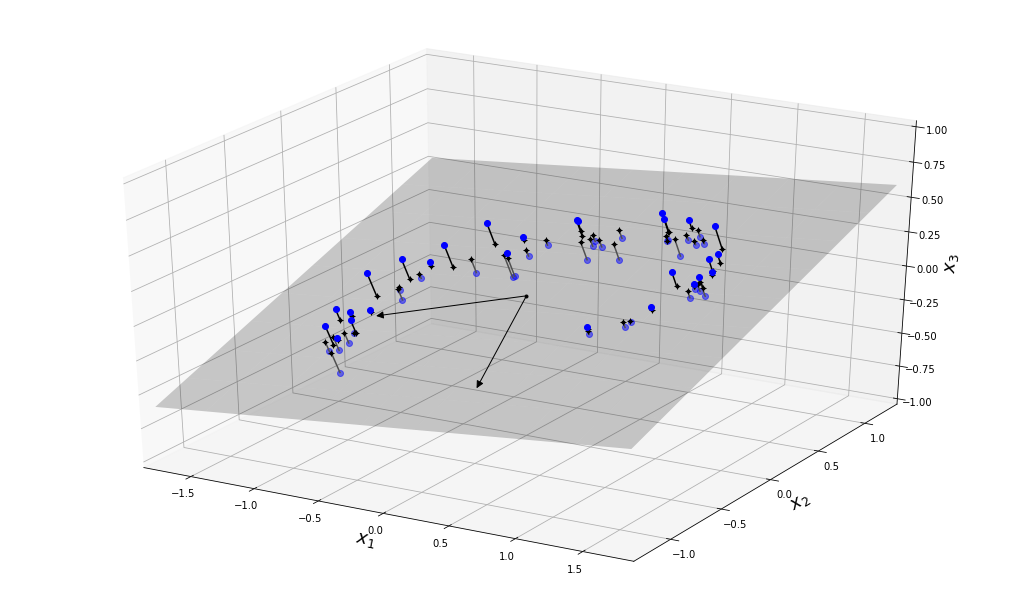

In [21]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)
        
axes = [-1.8, 1.8, -1.3, 1.3, -1.0, 1.0]

x1s = np.linspace(axes[0], axes[1], 10)
x2s = np.linspace(axes[2], axes[3], 10)
x1, x2 = np.meshgrid(x1s, x2s)

C = pca.components_
R = C.T.dot(C)
z = (R[0, 2] * x1 + R[1, 2] * x2) / (1 - R[2, 2])

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18, 10.8))
ax = fig.add_subplot(111, projection='3d')

X3D_above = X[X[:, 2] > X3D_inv[:, 2]]
X3D_below = X[X[:, 2] <= X3D_inv[:, 2]]

ax.plot(X3D_below[:, 0], X3D_below[:, 1], X3D_below[:, 2], "bo", alpha=0.5)

ax.plot_surface(x1, x2, z, alpha=0.2, color="k")
np.linalg.norm(C, axis=0)
ax.add_artist(Arrow3D([0, C[0, 0]],[0, C[0, 1]],[0, C[0, 2]], mutation_scale=15, lw=1, arrowstyle="-|>", color="k"))
ax.add_artist(Arrow3D([0, C[1, 0]],[0, C[1, 1]],[0, C[1, 2]], mutation_scale=15, lw=1, arrowstyle="-|>", color="k"))
ax.plot([0], [0], [0], "k.")

for i in range(m):
    if X[i, 2] > X3D_inv[i, 2]:
        ax.plot([X[i][0], X3D_inv[i][0]], [X[i][1], X3D_inv[i][1]], [X[i][2], X3D_inv[i][2]], "k-")
    else:
        ax.plot([X[i][0], X3D_inv[i][0]], [X[i][1], X3D_inv[i][1]], [X[i][2], X3D_inv[i][2]], "k-", color="#505050")
    
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "k+")
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "k.")
ax.plot(X3D_above[:, 0], X3D_above[:, 1], X3D_above[:, 2], "bo")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

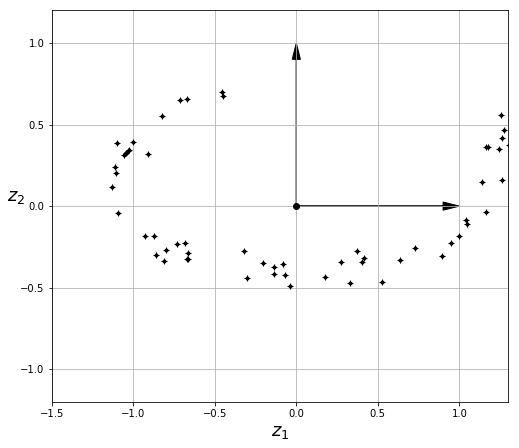

In [22]:
fig = plt.figure(figsize=(12, 7.2))
ax = fig.add_subplot(111, aspect='equal')

ax.plot(X2D[:, 0], X2D[:, 1], "k+")
ax.plot(X2D[:, 0], X2D[:, 1], "k.")
ax.plot([0], [0], "ko")
ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.set_xlabel("$z_1$", fontsize=18)
ax.set_ylabel("$z_2$", fontsize=18, rotation=0)
ax.axis([-1.5, 1.3, -1.2, 1.2])
ax.grid(True)
plt.show()

### Applying PCA on MNIST dataset

In [23]:
from six.moves import urllib
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [24]:
X = mnist["data"]
Y = mnist["target"]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [25]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

154

1. In PCA, n_components can be either 154 or number between 0.0 and 1.0.
2. If n_components between 0.0 and 1.0, then we are providing explained variance ratio as input.
3. If n_componenets is above 1, then we are providing number of components as an input

In [26]:
pca = PCA(n_components=0.95)
X_transformed = pca.fit_transform(X_train)
pca.n_components_

154

In [27]:
np.sum(pca.explained_variance_ratio_)

0.95044630302001842

### Incremental PCA
One problem with normal PCA is that it requires the entire dataset to fit in the memory to perfrom SVD. If the dataset size is more than the installed memory then normal PCA cannot be applied. In incremental PCA, dataset is split into n batches and PCA is applied separately on each batch and then combined at the end. partial_fit should be called on each batch and then transform function should be applied at the end on the entire dataset to get principal components

In [28]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components = 154)
for X_batch in np.array_split(X_train, n_batches):
    print(".", end="")
    inc_pca.partial_fit(X_batch)
    
X_reduced = inc_pca.transform(X_train)

....................................................................................................

In [29]:
np.sum(inc_pca.explained_variance_ratio_)

0.94974186026793062

In [30]:
print(np.allclose(pca.mean_, inc_pca.mean_))
print(np.allclose(X_reduced, X_transformed))

True
False


### Randomized PCA
This is a stochastic algorithm that quickly finds approximations of the first d pricipal components

In [31]:
rnd_pca = PCA(n_components=154, svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(X_train)

### Kernel PCA
##### https://goo.gl/5lQT5Q
This uses a kernel trick, a mathematical technique that implicitly maps instances into a very high dimensional space (called the feature space), enabling nonlinear classification and regression with Support Vector Machines. Recall that a linear decision boundary in the high dimensional feature space corresponds to a complex nonlinear decision boundary in the orthogonal space.

In [32]:
from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import KernelPCA

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.4)
X_reduced = rbf_pca.fit_transform(X)

Checking for the best hyper parameters for applying Kernel PCA

In [33]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression
# from sklearn.pipeline import Pipeline

# clf = Pipeline([
#     ("kpca", KernelPCA(n_components=2)),
#     ("log_reg", LogisticRegression())
# ])

# param_grid = [{
#         "kpca__gamma": np.linspace(0.03, 0.05, 10),
#         "kpca__kernel": ["rbf", "sigmoid"]
#     }]

# grid_search = GridSearchCV(clf, param_grid, cv=3)
# grid_search.fit(X, Y)
# print(grid_search.best_params_)

## Locally Linear Embedding (LLE)
1. LLE is a manifold technique
2. LLE works first by measuring how each instance is linearly related to it's closest neighbors, and then looking for a low dimensional representation of these instances where these local relationships are best preserved.
3. Read page 222 for more details

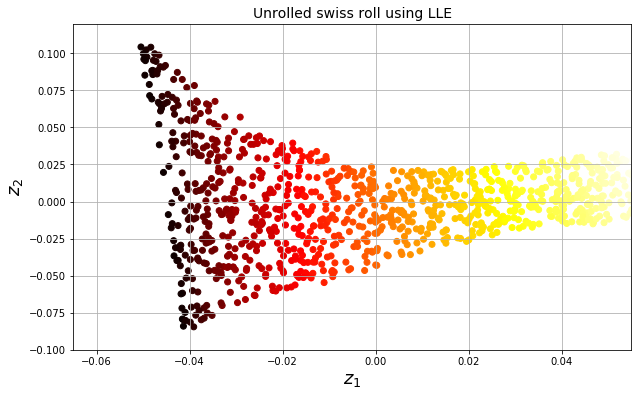

In [34]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)
plt.figure(figsize=(10, 6))
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)
plt.show()

### Exercises

In [1]:
import sklearn
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [2]:
X = mnist["data"]
Y = mnist["target"]

In [9]:
X_train = mnist["data"][:60000]
X_test = mnist["data"][60000:]

y_train = mnist["target"][:60000]
y_test = mnist["target"][60000:]

In [10]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(random_state=42)
import time
start_time = time.time()
rnd_clf.fit(X_train, y_train)
end_time = time.time()
print("Random Forest Classifier training time without PCA {:.2f}s".format(end_time-start_time))

Random Forest Classifier training time without PCA 4.39s


In [11]:
from sklearn.metrics import accuracy_score

y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.94550000000000001

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_trained_PCA = pca.fit_transform(X_train)
rnd_clf = RandomForestClassifier(random_state=42)
start_time = time.time()
rnd_clf.fit(X_trained_PCA, y_train)
end_time = time.time()
print("Random Forest Classifier training time with PCA {:.2f}s".format(end_time-start_time))

Random Forest Classifier training time without PCA 9.65s


In [13]:
X_test_PCA = pca.transform(X_test)

y_pred = rnd_clf.predict(X_test_PCA)
accuracy_score(y_test, y_pred)

0.89080000000000004

### Softmax Regression with and without PCA

In [18]:
#without PCA
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import time
softmax = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
start_time = time.time()
softmax.fit(X_train, y_train)
end_time = time.time()
print("Softmax Regression training time without PCA {:.2f}".format(end_time - start_time))
y_predict = softmax.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print("Accurary :", accuracy)

Softmax Regression training time without PCA 16.68
Accurary : 0.9252


In [20]:
#with PCA
pca = PCA(n_components=0.95)
X_train_PCA = pca.fit_transform(X_train)
softmax_PCA = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
start_time=time.time()
softmax_PCA.fit(X_train_PCA, y_train)
end_time=time.time()
print("Softmax Regression training time with PCA {:.2f}".format(end_time - start_time))
X_test_PCA = pca.transform(X_test)
y_predict = softmax_PCA.predict(X_test_PCA)
accuracy = accuracy_score(y_test, y_predict)
print("Accurary :", accuracy)

Softmax Regression training time with PCA 5.97
Accurary : 0.9198


### t-SNE on MNIST dataset